# Introduction to Qiskit
Welcome to Qiskit! Before starting with the exercises, please run the cell below by pressing 'shift' + 'return'.

Please just ignore the commented lines, but leave them in the code as they are, as they will be used later to evaluate your solutions.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from qiskit import Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute
from qiskit.visualization import plot_bloch_vector, plot_histogram

from __base import run_and_check, intro_sol1, intro_sol2, intro_sol3, intro_sol4, intro_sol5, intro_sol6, intro_sol7, intro_sol8, question_and_check, answers1, app, algos, combine_alg_and_appl

def bloch_vec(qc):
    backend = Aer.get_backend('statevector_simulator')
    ket = execute(qc, backend).result().get_statevector()
    if ket[0] !=0:
        theta = 2*np.arctan(np.abs(ket[1]/ket[0]))
        phi = np.angle(ket[1]/ket[0])
    else:
        theta = np.pi
        phi = 0
    bloch_vector = np.round([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)], 5)
    return bloch_vector

## I. Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)
### 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. <img src="state1.png" width="200"> 

1.0
1.0
1.0
 Correct! Well done! 

 Your score:  6 /8


/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0

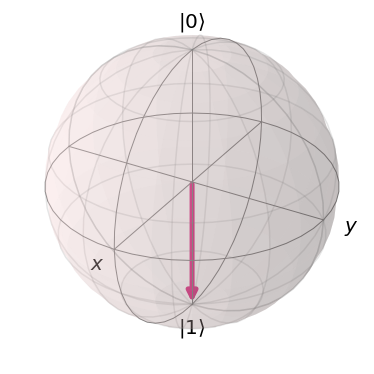

In [21]:
def intro_ex1():
    qc = QuantumCircuit(1)
    #
    #
    qc.x(0)
    #
    #
    bloch_vector = bloch_vec(qc)
    plot_bloch_vector(bloch_vector)
    return bloch_vector

run_and_check(intro_ex1(), intro_sol1())
plot_bloch_vector(intro_ex1())

### 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. <img src="plusstate.png" width="200"> 

1.0
1.0
1.0
 Correct! Well done! 

 Your score:  5 /8


/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0

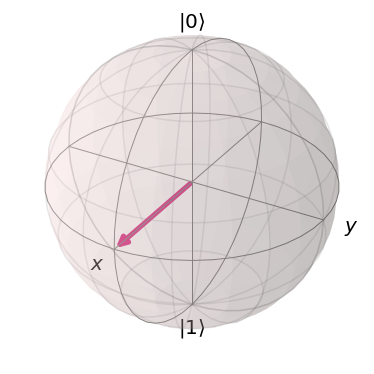

In [20]:
def intro_ex2():
    qc = QuantumCircuit(1)
    #
    #
    qc.h(0)
    #
    #
    bloch_vector = bloch_vec(qc)
    plot_bloch_vector(bloch_vector)
    return bloch_vector

run_and_check(intro_ex2(), intro_sol2())
plot_bloch_vector(intro_ex2())

### 3.) Let's combine those two. The goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. <img src="minusstate.png" width="200">  Can you even come up with different ways?

/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])


1.0
1.0
1.0
 Correct! Well done! 

 Your score:  4 /8


/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0

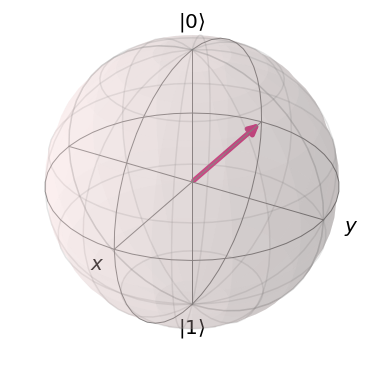

In [19]:
def intro_ex3():
    qc = QuantumCircuit(1)
    #
    #
    qc.h(0)
    qc.z(0)
    #
    #
    bloch_vector = bloch_vec(qc)
    plot_bloch_vector(bloch_vector)
    return bloch_vector

run_and_check(intro_ex3(), intro_sol3())
plot_bloch_vector(intro_ex3())

### 4.) Finally, we move on to the complex numbers. The goal is to reach the state $|\circlearrowleft\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle\right)$. <img src="leftstate.png" width="200"> 

1.0
1.0
1.0
 Correct! Well done! 

 Your score:  3 /8


/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
/home/melmatt7/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0

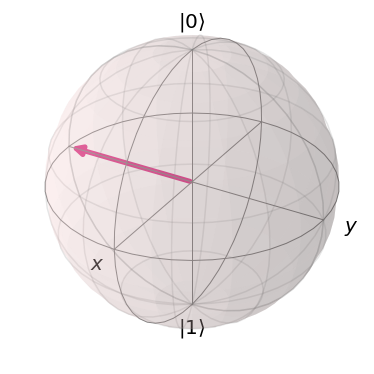

In [18]:
def intro_ex4():
    qc = QuantumCircuit(1)
    #
    #
    qc.h(0)
    qc.z(0)
    qc.s(0)
    #
    #
    bloch_vector = bloch_vec(qc)
    plot_bloch_vector(bloch_vector)
    return bloch_vector

run_and_check(intro_ex4(), intro_sol4())
plot_bloch_vector(intro_ex4())

## II. Quantum Circuits Using Multi-Qubit Gates
Great job! Now that you've understood the single-qubit gates, let us look at gates on multiple qubits. Check out this chapter if you would like to refresh the theory: https://qiskit.org/textbook/ch-gates/introduction.html. The basic gates on two and three qubits are given by

    qc.cx(c,t)       # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)       # controlled-Z gate with control qubit c and target qubit t
    qc.ccx(c1,c2,t)  # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t
    qc.swap(a,b)     # SWAP gate that swaps the states of qubit a and qubit b

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate . As it has no effect applied on two qubits in state $|0\rangle$, we apply a Hadamard gate before to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called Bell states. 
### 1.) Construct the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
 Correct! Well done! 

 Your score:  1 /8


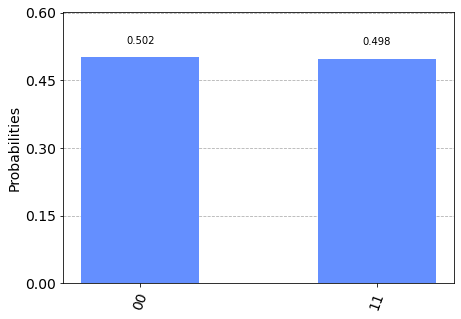

In [13]:
def intro_ex5():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also two classical bits for the measurement
    #
    #
    qc.h(0)
    qc.cx(0,1)
    #
    #
    qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
    qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
    print(qc) # we draw the circuit
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
    plt.show()
    return counts

counts = intro_ex5()
run_and_check(counts, intro_sol5())
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

As you can see in the histogram, the only possible outputs are "00" and "11", so the states of the two qubits are always perfectly correlated. Next, we would like to have to perfectly anti-correlated qubits. 
### 2.) Construct the Bell state $|\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$.

In [17]:
def intro_ex6():
    qc = QuantumCircuit(2)
    #
    #
    qc.h(0)
    qc.cx(0,1)
    qc.x(0)
    qc.z(0)
    #
    #
    print(qc)
    backend = Aer.get_backend('statevector_simulator') # we chose the statevector simulator as our backend
    vec = execute(qc, backend).result().get_statevector() # we calculate the statevector rather than measurement outcomes
    return vec

print(intro_ex6())
run_and_check(intro_ex6(), intro_sol6())

     ┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├
     └───┘┌─┴─┐└───┘└───┘
q_1: ─────┤ X ├──────────
          └───┘          
[ 4.32978028e-17+1.06049031e-32j -7.07106781e-01-2.59786817e-16j
  7.07106781e-01+2.59786817e-16j  4.32978028e-17+2.12098062e-32j]
     ┌───┐     ┌───┐┌───┐
q_0: ┤ H ├──■──┤ X ├┤ Z ├
     └───┘┌─┴─┐└───┘└───┘
q_1: ─────┤ X ├──────────
          └───┘          
[ 4.32978028e-17+0.j -7.07106781e-01+0.j  7.07106781e-01+0.j
  4.32978028e-17+0.j]
1.0
1.0
1.0
1.0
 Correct! Well done! 

 Your score:  2 /8


This time, the only possible outcomes are "01" and "10", which are given by the second and third entry of the state vector.

### 3.) You are given the quantum circuit described in the function below. Swap the state of the first and the second wire, perform a measurement and return the counts.

     ┌─────────┐   ┌─┐   
q_0: ┤ Rx(π/3) ├─X─┤M├───
     └──┬───┬──┘ │ └╥┘┌─┐
q_1: ───┤ X ├────X──╫─┤M├
        └───┘       ║ └╥┘
c: 2/═══════════════╩══╩═
                    0  1 
 Correct! Well done! 

 Your score:  7 /8


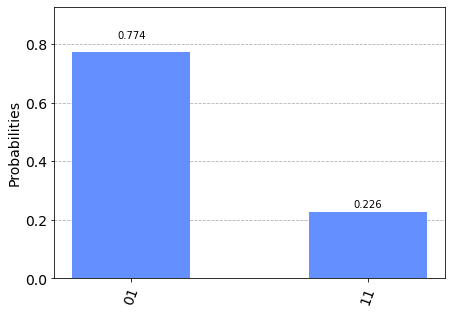

In [24]:
def intro_ex7():
    qc = QuantumCircuit(2,2)
    qc.rx(np.pi/3,0)
    qc.x(1)
    #
    #
    qc.swap(0,1)
    qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
    qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
    #
    print(qc) # we draw the circuit
    backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
    counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
    plt.show()
    return counts

counts = intro_ex7()
run_and_check(counts, intro_sol7())
plot_histogram(counts)

### 4.) Write a function from scratch that creates a quantum circuit on 3 qubits, creates the GHZ state, $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$, and returns the state vector.

In [27]:
def intro_ex8():
    qc = QuantumCircuit(3)
    #
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)
    #
    #
    print(qc)
    backend = Aer.get_backend('statevector_simulator') # we chose the statevector simulator as our backend
    vec = execute(qc, backend).result().get_statevector() # we calculate the statevector rather than measurement outcomes
    return vec

print(intro_ex8())
run_and_check(intro_ex8(), intro_sol8())

     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
 Correct! Well done! 

 Your score:  8 /8


Congratulations for finishing this introduction to Qiskit! If something is unclear you can send an email to irojkov@student.ethz.ch (I really can't help at all with installation problems though).